<a href="https://colab.research.google.com/github/eemayes2/IE517_F21_HW3/blob/main/IE517_HWK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA: Corporate Bond Set 

Perform an exploratory data analysis (EDA) on the "High Yield Corporate Bond" dataset.  Use the code listings presented in Bowles Chapter 2 to guide you.

You do NOT have to do any other datasets (sonar_all_data or "rocks_v_mines", abalone, winequality or glass)!

Figure out how best to include the information, visually and quantitatively.  Refer to the code in listing 2-1 through 2-10 and also the Datacamp assignments.


In [1]:
import pandas as pd
df = pd.read_csv('HY_Universe_corporate bond.csv', header=0)

df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,Issued Amount,Maturity Type,Coupon Type,Maturity At Issue months,Industry,LiquidityScore,Months in JNK,Months in HYG,Months in Both,IN_ETF,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,days_diff_max,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,405000000.0,CALLABLE,PAY-IN-KIND,60.87,Real Estate,10.891365,Nan,Nan,Nan,No,0.108914,301,2.640038e+08,1000000.0,877088.9535,128,1132,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,499285000.0,AT MATURITY,FIXED,173.13,Banks,24.625486,0,33,0,Yes,0.246255,2854,2.668630e+08,24000.0,93504.9054,614,1041,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,460000000.0,CALLABLE,FIXED,58.87,Household Products/Wares,12.841557,Nan,Nan,Nan,No,0.128416,434,2.814210e+08,875000.0,648435.4839,183,439,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,500000000.0,CALLABLE,FIXED,83.63,Household Products/Wares,26.226355,43,0,0,Yes,0.262264,4975,1.163167e+09,26000.0,233802.4121,773,1227,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,400000000.0,CALLABLE,FIXED,97.17,Household Products/Wares,14.138395,Nan,Nan,Nan,No,0.141384,388,2.493420e+08,750000.0,642634.0206,126,246,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [2]:
#Listing 2-1, modified for df: find shape of dataframe
df.shape

(2721, 37)

In [3]:
#Listing 2-2, column data types
df.dtypes

CUSIP                          object
Ticker                         object
Issue Date                     object
Maturity                       object
1st Call Date                  object
Moodys                         object
S_and_P                        object
Fitch                          object
Bloomberg Composite Rating     object
Coupon                        float64
Issued Amount                 float64
Maturity Type                  object
Coupon Type                    object
Maturity At Issue months      float64
Industry                       object
LiquidityScore                float64
Months in JNK                  object
Months in HYG                  object
Months in Both                 object
IN_ETF                         object
LIQ SCORE                     float64
n_trades                        int64
volume_trades                 float64
total_median_size             float64
total_mean_size               float64
n_days_trade                    int64
days_diff_ma

In [4]:
#Listing 2-3 (actually 2-5), adapted for dataframe (summary statistics)
df.describe(include = 'all')

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,Issued Amount,Maturity Type,Coupon Type,Maturity At Issue months,Industry,LiquidityScore,Months in JNK,Months in HYG,Months in Both,IN_ETF,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,days_diff_max,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721.000000,2.721000e+03,2721,2721,2721.000000,2721,2721.000000,2721,2721,2721,2721,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2.721000e+03,2.721000e+03,2.721000e+03,2721.000000,2721.000000
unique,2721,870,1545,1108,331,45,41,39,28,NaN,NaN,12,10,NaN,69,NaN,65,69,64,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,28368EAE6,LEH,3/14/2013,Nan Field Not Applicable,Nan,WR,NR,Nan,NR,NaN,NaN,CALLABLE,FIXED,NaN,Banks,NaN,Nan,Nan,Nan,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,45,9,86,1757,1039,1009,1170,1136,NaN,NaN,1560,2139,NaN,380,NaN,1408,1408,1408,1408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.307872,8.299295e+08,NaN,NaN,113.968997,NaN,18.218230,NaN,NaN,NaN,NaN,0.182182,2700.696435,7.222372e+08,5.361476e+05,5.255853e+05,316.581771,724.219772,0.244306,0.676536,3.496141,0.379648,7.588325e+06,5.672609e+06,4.915523e+07,6.690499e+05,21.598988,2.471885
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.051382,5.802790e+08,NaN,NaN,101.893176,NaN,7.872071,NaN,NaN,NaN,NaN,0.078721,5572.262205,1.027825e+09,4.193546e+05,2.670677e+05,347.802629,587.196329,0.152165,0.219661,1.712004,0.144545,8.979311e+06,7.340321e+06,6.703860e+07,3.094537e+06,32.901129,5.581749
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.700000e+08,NaN,NaN,11.930000,NaN,4.388758,NaN,NaN,NaN,NaN,0.043888,1.000000,7.000000e+03,4.000000e+03,5.000000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000e+03,7.000000e+03,7.000000e+03,1.400000e+01,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000e+08,NaN,NaN,65.170000,NaN,12.738630,NaN,NaN,NaN,NaN,0.127386,116.000000,6.189000e+07,7.500000e+04,3.010473e+05,45.000000,213.000000,0.124731,0.534224,1.000000,0.290826,2.295273e+06,1.750000e+06,9.020000e+06,2.100000e+04,4.046154,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.250000,6.500000e+08,NaN,NaN,97.370000,NaN,16.538471,NaN,NaN,NaN,NaN,0.165385,674.000000,3.480000e+08,5.000000e+05,5.769231e+05,184.000000,608.000000,0.250000,0.681992,5.000000,0.376385,4.926339e+06,3.527000e+06,2.410000e+07,1.060000e+05,10.821429,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.750000,1.000000e+09,NaN,NaN,121.770000,NaN,22.120108,NaN,NaN,NaN,NaN,0.221201,2467.000000,9.328420e+08,1.000000e+06,7.289650e+05,483.000000,1094.000000,0.356808,0.859256,5.000000,0.448718,9.649299e+06,7.011000e+06,6.370500e+07,4.300000e+05,24.526316,2.000000


In [5]:
#drop unique identifiers
df = df.drop(columns = ['CUSIP', 'Ticker', 'Issue Date', 'Maturity'])

In [6]:
df. count()

1st Call Date                 2721
Moodys                        2721
S_and_P                       2721
Fitch                         2721
Bloomberg Composite Rating    2721
Coupon                        2721
Issued Amount                 2721
Maturity Type                 2721
Coupon Type                   2721
Maturity At Issue months      2721
Industry                      2721
LiquidityScore                2721
Months in JNK                 2721
Months in HYG                 2721
Months in Both                2721
IN_ETF                        2721
LIQ SCORE                     2721
n_trades                      2721
volume_trades                 2721
total_median_size             2721
total_mean_size               2721
n_days_trade                  2721
days_diff_max                 2721
percent_intra_dealer          2721
percent_uncapped              2721
bond_type                     2721
Client_Trade_Percentage       2721
weekly_mean_volume            2721
weekly_median_volume

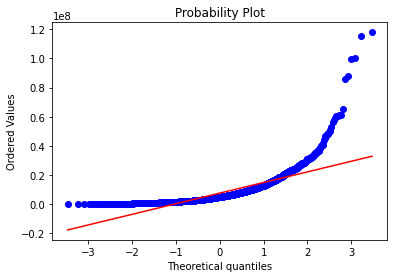

In [7]:
#Listing 2-4: Q-Q Plot
import scipy.stats as stats
import pylab
stats.probplot(df['weekly_mean_volume'], dist = "norm", plot = pylab)
pylab.show()

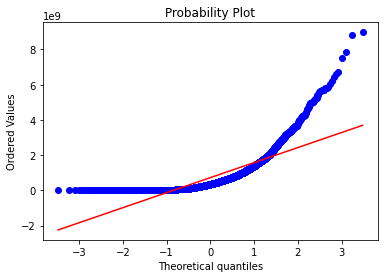

In [8]:
#Listing 2-4: Q-Q Plot
import scipy.stats as stats
import pylab
stats.probplot(df['volume_trades'], dist = "norm", plot = pylab)
pylab.show()

Text(0, 0.5, 'volume trades')

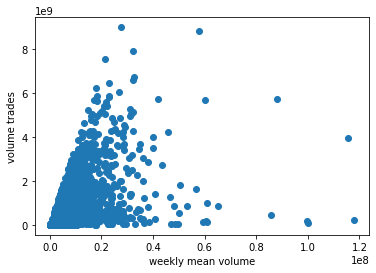

In [9]:
#Listing 2-7
import matplotlib.pyplot as plt
plt.scatter(df['weekly_mean_volume'], df['volume_trades'])
plt.xlabel('weekly mean volume')
plt.ylabel('volume trades')

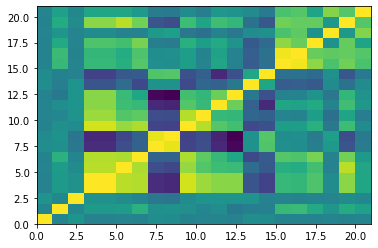

In [10]:
#Listing 2-10
from pandas import DataFrame
corMat = DataFrame(df.corr())

plt.pcolor(corMat)
plt.show()

Text(0, 0.5, 'Frequency')

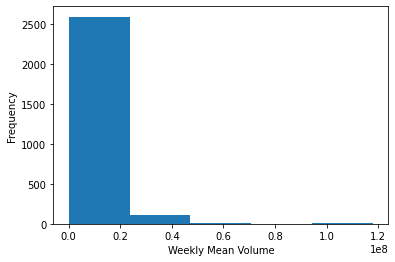

In [11]:
#Histogram
plt.hist(df['weekly_mean_volume'], bins = 5)
plt.xlabel('Weekly Mean Volume')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

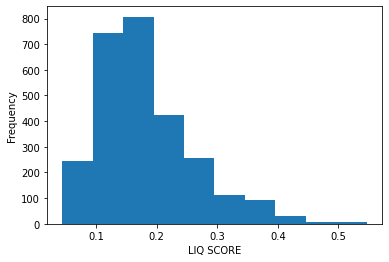

In [12]:
#Histogram
plt.hist(df['LIQ SCORE'])
plt.xlabel('LIQ SCORE')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.6% of the points cannot be placed; yo

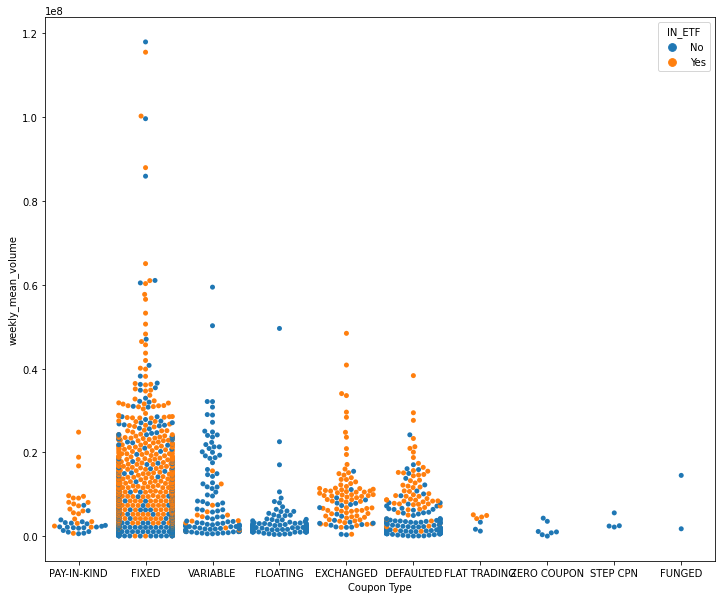

In [15]:
# BEE Swarm
import seaborn as sns
fig_dims = (12, 10)
fig,ax = plt.subplots(figsize = fig_dims)
s = sns.swarmplot(x = 'Coupon Type', y = 'weekly_mean_volume', hue = 'IN_ETF', ax = ax, data = df)


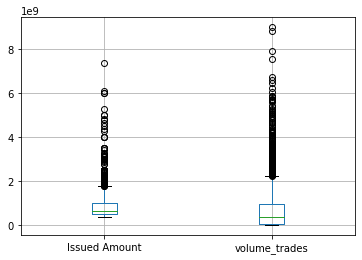

In [26]:
#Boxplots
df.boxplot(column = ['Issued Amount', 'volume_trades'])

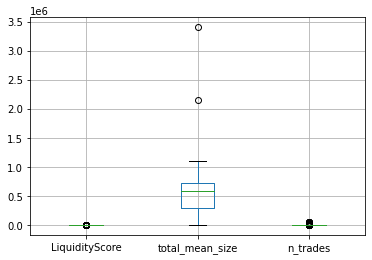

In [28]:
df.boxplot(column = ['LiquidityScore', 'total_mean_size', 'n_trades'])

#obvious in this plot we have a scale problem. Can see it in data, but boxplots highlight that some are 10^6, 10^9, or 10^1 numeric values, so we need to address this when 
# getting data ready to fit model

In [29]:
print("My name is Emma Mayes")
print("My NetID is: eemayes2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Emma Mayes
My NetID is: eemayes2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [30]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('IE517_HWK3.ipynb')

--2021-09-10 22:11:42--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-09-10 22:11:43 (21.2 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IE517_HWK3.ipynb to pdf
[NbConvertApp] Support files will be in IE517_HWK3_files/
[NbConvertApp] Making directory ./IE517_HWK3_files
[NbConvertApp] Making directory ./IE517_HWK3_files
[NbConvertApp] Making directory ./IE517_HWK3_files
[NbConvertApp] Making directory ./IE517_HWK3_files
[NbConvertApp] Makin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'